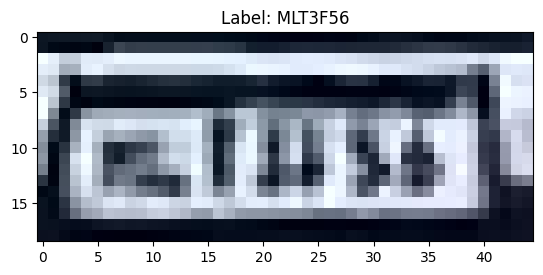

In [9]:
import pandas as pd
import cv2
import matplotlib.pyplot as plt

# Load the manifest we just created
df = pd.read_csv('../data/training_manifest.csv')

# Pick one random row to test
sample = df.sample(1).iloc[0]
img = cv2.imread(f"../{sample['lr_full_path']}")
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

plt.imshow(img)
plt.title(f"Label: {sample['plate_text']}")
plt.show()

In [ ]:
%load_ext autoreload
%autoreload 2

import sys
import os
import torch
from torch.utils.data import DataLoader

# Ensure the root is in sys.path
sys.path.append(os.path.abspath('..'))

from src.dataset import LPRDataset

In [ ]:
def _safe_read(self, path):
        if not path or pd.isna(path):
            return None
            
        full_path = os.path.normpath(os.path.join(self.root_dir, path))
        
        # Read the file
        img = cv2.imread(full_path)
        
        # Check if the image actually loaded before doing ANYTHING else
        if img is None or img.size == 0:
            return None
        
        # Only perform operations if img is NOT empty
        img = cv2.resize(img, self.target_size)
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB) # This is where it was crashing
        img = img.astype(np.float32) / 255.0
        return np.transpose(img, (2, 0, 1))

Original path from CSV: data/raw\wYe7pBJ7-train\train\Scenario-A\Brazilian\track_05715\lr-004.png
Corrected path for Notebook: ..\data\raw\wYe7pBJ7-train\train\Scenario-A\Brazilian\track_05715\lr-004.png


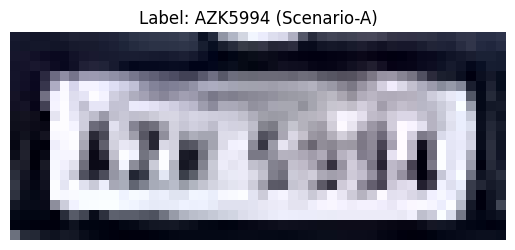

In [2]:
import pandas as pd
import cv2
import matplotlib.pyplot as plt
import os

# 1. Load the manifest (Corrected to go up to project root)
df = pd.read_csv('../data/training_manifest.csv')

# 2. Pick a random row
sample = df.sample(1).iloc[0]

# 3. FIX THE PATH: 
# Join '..' with the path from the CSV and normalize slashes for Windows
relative_path = sample['lr_full_path']
img_path = os.path.normpath(os.path.join('..', relative_path))

print(f"Original path from CSV: {relative_path}")
print(f"Corrected path for Notebook: {img_path}")

# 4. Attempt to load
if os.path.exists(img_path):
    img = cv2.imread(img_path)
    if img is not None:
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        plt.imshow(img)
        plt.title(f"Label: {sample['plate_text']} ({sample['scenario']})")
        plt.axis('off')
        plt.show()
    else:
        print("Error: OpenCV found the file but could not read it.")
else:
    print(f"Error: Still not found at {os.path.abspath(img_path)}")

Checking path: ..\data\raw\wYe7pBJ7-train\train\Scenario-A\Mercosur\track_07539\lr-003.png


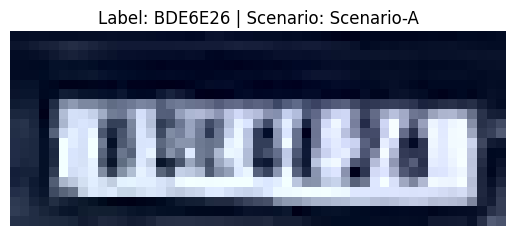

In [3]:
import pandas as pd
import cv2
import matplotlib.pyplot as plt
import os

# 1. Load the manifest
df = pd.read_csv('../data/training_manifest.csv')

# 2. Pick a random row
sample = df.sample(1).iloc[0]

# 3. GET THE PATH AND CLEAN IT
# We use .replace('/', os.sep) to ensure the slashes match your OS
raw_path = sample['lr_full_path'].replace('/', os.sep).replace('\\', os.sep)

# Join with '..' because the notebook is in the 'notebooks' folder
# normpath() cleans up the '..', 'data', and 'raw' segments into one valid string
corrected_path = os.path.normpath(os.path.join('..', raw_path))

print(f"Checking path: {corrected_path}")

# 4. LOAD AND SHOW
if os.path.exists(corrected_path):
    # Use cv2.IMREAD_COLOR to ensure it loads properly
    img = cv2.imread(corrected_path, cv2.IMREAD_COLOR)
    
    if img is not None:
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        plt.imshow(img)
        plt.title(f"Label: {sample['plate_text']} | Scenario: {sample['scenario']}")
        plt.axis('off')
        plt.show()
    else:
        print("Error: OpenCV could not decode the image. Check if the file is corrupted.")
else:
    print(f"❌ Path still not found: {os.path.abspath(corrected_path)}")

In [5]:
import sys
import os
import torch
from torch.utils.data import DataLoader

# 1. Add the project root to the system path
# This allows the notebook to find the 'src' folder
sys.path.append(os.path.abspath('..'))

# 2. Now you can import your custom dataset class
from src.dataset import LPRDataset

# 3. Initialize the dataset
# We use '..' because the notebook is inside 'notebooks/' 
# but the data is inside 'data/' at the root
ds = LPRDataset(csv_file='../data/training_manifest.csv', root_dir='..')

# 4. Create a DataLoader
train_loader = DataLoader(ds, batch_size=4, shuffle=True)

# 5. Get one batch and test it
try:
    batch = next(iter(train_loader))
    lr_batch, second_item = batch
    print(f"✅ Success! LR Batch Shape: {lr_batch.shape}")
    
    if isinstance(second_item, torch.Tensor):
        print(f"HR Batch Shape: {second_item.shape}")
    else:
        print(f"Sample Plate Texts: {second_item}")
except Exception as e:
    print(f"❌ Error during loading: {e}")

✅ Success! LR Batch Shape: torch.Size([4, 3, 40, 110])
HR Batch Shape: torch.Size([4, 3, 40, 110])


In [6]:
from src.model import SRCNN

# 1. Initialize the model
model = SRCNN()

# 2. Move model to GPU if available
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)

# 3. Test a single batch from your existing train_loader
lr_batch, hr_batch = next(iter(train_loader))
lr_batch = lr_batch.to(device)

# 4. Pass the LR images through the "Brain"
output = model(lr_batch)

print(f"Input Shape: {lr_batch.shape}")   # Should be [4, 3, 40, 110]
print(f"Output Shape: {output.shape}")    # Should also be [4, 3, 40, 110]
print(f"Using Device: {device}")

Input Shape: torch.Size([4, 3, 40, 110])
Output Shape: torch.Size([4, 3, 40, 110])
Using Device: cpu


In [7]:
import torch; print(torch.cuda.is_available())

False
